# Import Relevant Data

In [57]:
import pandas as pd
import ast
import numpy as np
import math
import time
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [58]:
df_cryp=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SignatureWork/main/Data/2017to2022_rarity_gas_usd_price.csv')
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85
1,1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.499040e+09,1499040000,1.180929e+08,1499040000,276.41
2,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85
3,3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.553040e+09,1553040000,5.115253e+07,1553040000,140.22
4,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109,67.515097,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97
17822,17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922,144.347171,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97
17823,17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,...,#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773,52.620913,1.658102e+09,1658102400,1.475703e+08,1658102400,1583.55
17824,17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949,0.000000,1.658362e+09,1658361600,1.027865e+08,1658361600,1575.68


# Volume of Active Market Wallet & Daily Change Rate

In [59]:
df_group=df_cryp.groupby('date_x').count()
active_wallet=np.array(df_group['Unnamed: 0'])*2
df_wallet=DataFrame({"active_wallet": active_wallet,
                     "date":df_group.index})
df_wallet

,active_wallet,date
0,34,2017-06-23
1,34,2017-06-24
2,24,2017-06-25
3,10,2017-06-26
4,46,2017-06-27
...,...,...
1364,4,2022-07-22
1365,4,2022-07-23
1366,12,2022-07-25
1367,6,2022-07-26


In [60]:
df_wallet['active_wallet_shift']=df_wallet['active_wallet'].shift(1)
df_wallet['active_wallet_shift'][0]=3
df_wallet

<ipython-input-60-51ec93477ae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wallet['active_wallet_shift'][0]=3


,active_wallet,date,active_wallet_shift
0,34,2017-06-23,3.0
1,34,2017-06-24,34.0
2,24,2017-06-25,34.0
3,10,2017-06-26,24.0
4,46,2017-06-27,10.0
...,...,...,...
1364,4,2022-07-22,4.0
1365,4,2022-07-23,4.0
1366,12,2022-07-25,4.0
1367,6,2022-07-26,12.0


In [61]:
wallet_change=(np.array(df_wallet['active_wallet'])-np.array(df_wallet['active_wallet_shift']))/np.array(df_wallet['active_wallet_shift'])
df_wallet['wallet_change']=wallet_change
df_wallet['wallet_change']

0       10.333333
1        0.000000
2       -0.294118
3       -0.583333
4        3.600000
          ...    
1364     0.000000
1365     0.000000
1366     2.000000
1367    -0.500000
1368    -0.333333
Name: wallet_change, Length: 1369, dtype: float64

In [62]:
df_cryp=df_cryp.merge(df_wallet, left_on='date_x', right_on='date')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [63]:
df_cryp.to_csv('wallet_rarity_usd_gas_merged.csv')
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date_x,eth_usd_price,active_wallet,date_y,active_wallet_shift,wallet_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,28.734107,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,484.728383,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,0.000000,1.644970e+09,1644969600,3.597364e+08,1644969600,3124.33,2,2022-02-16,4.0,-0.500000
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,0.000000,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,169.953199,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,16.679182,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000


# Volume of Cryptopunks Sales Daily Change Rate

In [64]:
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date_x,eth_usd_price,active_wallet,date_y,active_wallet_shift,wallet_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,28.734107,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,484.728383,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,34,2017-06-23,3.0,10.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,0.000000,1.644970e+09,1644969600,3.597364e+08,1644969600,3124.33,2,2022-02-16,4.0,-0.500000
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,0.000000,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,169.953199,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,16.679182,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,6,2022-05-20,12.0,-0.500000


In [65]:
sales=df_cryp.groupby('timestamp')['eth_price'].sum()
sales

timestamp
1.498176e+09      2.084000
1.498262e+09      3.576000
1.498349e+09      1.746740
1.498435e+09      0.820001
1.498522e+09      6.443038
                   ...    
1.658448e+09    177.000000
1.658534e+09    198.000000
1.658707e+09    410.400000
1.658794e+09    257.900000
1.658880e+09    174.640000
Name: eth_price, Length: 1369, dtype: float64

In [66]:
df_sales=DataFrame({'daily_sales':sales,
                    'date_z':df_group.index})
df_sales

,daily_sales,date_z
timestamp,,
1.498176e+09,2.084000,2017-06-23
1.498262e+09,3.576000,2017-06-24
1.498349e+09,1.746740,2017-06-25
1.498435e+09,0.820001,2017-06-26
1.498522e+09,6.443038,2017-06-27
...,...,...
1.658448e+09,177.000000,2022-07-22
1.658534e+09,198.000000,2022-07-23
1.658707e+09,410.400000,2022-07-25


In [67]:
df_sales['sales_shift']=df_sales['daily_sales'].shift(1)
df_sales['sales_shift'][0]=0.42
change_sales=(np.array(df_sales['daily_sales'])-np.array(df_sales['sales_shift']))/np.array(df_sales['sales_shift'])
change_sales

<ipython-input-67-c0bd02db3cfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['sales_shift'][0]=0.42
<ipython-input-67-c0bd02db3cfe>:3: RuntimeWarning: divide by zero encountered in true_divide
  change_sales=(np.array(df_sales['daily_sales'])-np.array(df_sales['sales_shift']))/np.array(df_sales['sales_shift'])


array([ 3.96190476,  0.7159309 , -0.51153798, ...,  1.07272727,
       -0.37158869, -0.32283831])

In [68]:
df_sales['daily_sales_change']=change_sales
df_sales

,daily_sales,date_z,sales_shift,daily_sales_change
timestamp,,,,
1.498176e+09,2.084000,2017-06-23,0.420000,3.961905
1.498262e+09,3.576000,2017-06-24,2.084000,0.715931
1.498349e+09,1.746740,2017-06-25,3.576000,-0.511538
1.498435e+09,0.820001,2017-06-26,1.746740,-0.530554
1.498522e+09,6.443038,2017-06-27,0.820001,6.857354
...,...,...,...,...
1.658448e+09,177.000000,2022-07-22,168.680000,0.049324
1.658534e+09,198.000000,2022-07-23,177.000000,0.118644
1.658707e+09,410.400000,2022-07-25,198.000000,1.072727


In [69]:
df_cryp=df_cryp.merge(df_sales,left_on='timestamp',right_on='timestamp')

In [70]:
df_cryp.to_csv('sales_wallet_rarity_gas_usd.csv')

In [71]:
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_x,eth_usd_price,active_wallet,date_y,active_wallet_shift,wallet_change,daily_sales,date_z,sales_shift,daily_sales_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,1498176000,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,1644969600,3124.33,2,2022-02-16,4.0,-0.500000,76.480,2022-02-16,185.00,-0.586595
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,1653004800,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,1653004800,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,1653004800,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779


# Cryptopunk Price(USD)

In [72]:
df_cryp['Price']=np.array(df_cryp['eth_price'])*np.array(df_cryp['eth_usd_price'])
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,eth_usd_price,active_wallet,date_y,active_wallet_shift,wallet_change,daily_sales,date_z,sales_shift,daily_sales_change,Price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,9.8055
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,13.0740
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,81.7125
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,98.0550
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,65.3700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,3124.33,2,2022-02-16,4.0,-0.500000,76.480,2022-02-16,185.00,-0.586595,238948.7584
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779,106728.2352
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779,99409.5040
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,1956.88,6,2022-05-20,12.0,-0.500000,156.850,2022-05-20,447.86,-0.649779,100798.8888


# ROI

## roi1

In [73]:
number = df_cryp.groupby(['punk_id']).count()
max(number['type'])

15

In [74]:
roi = df_cryp.groupby(['punk_id']).agg({'Price':['min','max']})
#roi.rename(columns={'data1':'data1_min'},inplace=True)#修改列名
roi=roi['Price']
roi

,min,max
punk_id,,
1,5154.680000,5154.6800
14,184.869000,351.4445
53,27491.400000,431919.0729
89,7050.273100,7050.2731
116,228.660000,455.9280
...,...,...
9980,81238.588800,87978.3125
9982,405112.050000,483770.2200
9990,0.029138,225753.3030


In [75]:
roi['ROI'] = (roi['max']-roi['min'])/roi['min']
roi

,min,max,ROI
punk_id,,,
1,5154.680000,5154.6800,0.000000e+00
14,184.869000,351.4445,9.010461e-01
53,27491.400000,431919.0729,1.471106e+01
89,7050.273100,7050.2731,0.000000e+00
116,228.660000,455.9280,9.939124e-01
...,...,...,...
9980,81238.588800,87978.3125,8.296210e-02
9982,405112.050000,483770.2200,1.941640e-01
9990,0.029138,225753.3030,7.747765e+06


## roi2

In [76]:
roi2 = df_cryp.groupby(['punk_id'])['timestamp','punk_id','Price']
roi2.get_group(197)

<ipython-input-76-5cb3efb4e904>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  roi2 = df_cryp.groupby(['punk_id'])['timestamp','punk_id','Price']


,timestamp,punk_id,Price
13355,1.638490e+09,197,295352.40
14663,1.642810e+09,197,0.00
14664,1.642810e+09,197,0.00
16989,1.640822e+09,197,241155.20
16990,1.640822e+09,197,237445.12


In [77]:
df_cryp.loc[1,'timestamp']

1498176000.0

In [78]:
list_roi=[]
rq=[] #date
for i in roi.index:
  if len(list(roi2.get_group(i).index)) >1:
    for j in range(len(list(roi2.get_group(i).index)[0:-1])):
     
      a=(roi2.get_group(i).iloc[j+1,2]-roi2.get_group(i).iloc[j,2])/roi2.get_group(i).iloc[j,2]
      list_roi.append(a) 
      b=df_cryp.loc[j,'timestamp']
      rq.append(b)
  
len(list_roi)

<ipython-input-78-ae1cd30103ba>:7: RuntimeWarning: invalid value encountered in double_scalars
  a=(roi2.get_group(i).iloc[j+1,2]-roi2.get_group(i).iloc[j,2])/roi2.get_group(i).iloc[j,2]
<ipython-input-78-ae1cd30103ba>:7: RuntimeWarning: divide by zero encountered in double_scalars
  a=(roi2.get_group(i).iloc[j+1,2]-roi2.get_group(i).iloc[j,2])/roi2.get_group(i).iloc[j,2]


11551

In [79]:
ROI=DataFrame({'Time':rq,
               'ROI':list_roi})
ROI

,Time,ROI
0,1.498176e+09,0.901046
1,1.498176e+09,-0.334105
2,1.498176e+09,-0.900295
3,1.498176e+09,-0.361620
4,1.498176e+09,0.993912
...,...,...
11546,1.498176e+09,-0.162594
11547,1.498176e+09,-0.804058
11548,1.498176e+09,-0.999999
11549,1.498176e+09,4.846569


In [80]:
#df_cryp=df_cryp.merge(ROI,left_on='timestamp',right_on='Time')

In [81]:
#df_cryp=df_cryp[df_cryp['ROI']<100000]

In [82]:
#df_cryp.to_csv('roi_sales_wallet_rarity_gas_usd.csv')

In [83]:
#df_cryp=pd.read_csv('https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/hedonic_data/roi_sales_wallet_rarity_gas_usd.csv')
df_cryp.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date_x', 'from', 'to', 'eth_price',
       'punk_id', 'type', 'gender', 'skin_tone', 'attr_count', 'attributes',
       'skin_tone_color', 'img_url', 'Rarity_Score_1_rarest',
       'Rarity_Score_2_Average', 'Rarity_Score_3_multiple', 'timestamp',
       'date_y', 'gas_eth_price', 'date_x', 'eth_usd_price', 'active_wallet',
       'date_y', 'active_wallet_shift', 'wallet_change', 'daily_sales',
       'date_z', 'sales_shift', 'daily_sales_change', 'Price'],
      dtype='object')

## Correlation

In [84]:
# Visualisations
"""将数据进行可视化"""
#print(train.head(3))
# correlation heatmap   相关性热点矩阵
 
#plt.figure(figsize=(14,12))
#plt.title('Pearson Correlation of Features',y=1.05,size=15)
#sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
            #square=True,linecolor='white',annot=True)
#plt.show()

'将数据进行可视化'

# Explaination

# Stationay Test

## Augmented Dickey Fuller test (ADF Test)：

零假设为序列有单位根，是非稳的，P-Value如果小于显著级别(0.05)，则可以拒绝零假设。

In [85]:
from statsmodels.tsa.stattools import adfuller, kpss
df = df_cryp

# ADF Test
result = adfuller(df.Price.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.120467340536699
p-value: 2.4300005847698592e-26
Critial Values:
   1%, -3.4307175739704157
Critial Values:
   5%, -2.861702453666342
Critial Values:
   10%, -2.566856469840447


In [86]:
# ADF Test
#df = df_cryp
#result = adfuller(df.ROI.values, autolag='AIC')
#print(f'ADF Statistic: {result[0]}')
#print(f'p-value: {result[1]}')
#for key, value in result[4].items():
#    print('Critial Values:')
#    print(f'   {key}, {value}')

## Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)：

与ADF正好相反，零假设为序列是*稳的。另外，在python中，可以通过指定regression='ct'参数来让kps把“确定性趋势(deterministic trend)”的序列认为是*稳的。

In [87]:
# KPSS Test
result = kpss(df.Price.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.487285
p-value: 0.044530
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [88]:
# KPSS Test
#result = kpss(df.ROI.values, regression='c')
#print('\nKPSS Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#for key, value in result[3].items():
#    print('Critial Values:')
#    print(f'   {key}, {value}')

# Hedonic Regression

## 2017-2021

In [89]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,eth_usd_price,active_wallet,date_y,active_wallet_shift,wallet_change,daily_sales,date_z,sales_shift,daily_sales_change,Price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,9.8055
15,29,29,2017-06-23,1406,166,0.01,3134,Human,Male,Medium,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,3.2685
14,28,28,2017-06-23,166,4722,0.10,5056,Human,Male,Albino,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,32.6850
13,26,26,2017-06-23,1406,1218,0.06,6208,Human,Male,Medium,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,19.6110
12,24,24,2017-06-23,1406,2518,0.20,5545,Human,Female,Albino,...,326.85,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,65.3700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,17613,17613,2022-07-26,3002,1044,94.90,5600,Human,Male,Albino,...,1449.61,6,2022-07-26,12.0,-0.500000,257.900,2022-07-26,410.40,-0.371589,137567.9890
17753,17440,17440,2022-07-26,5318,4950,69.00,4430,Human,Female,Albino,...,1449.61,6,2022-07-26,12.0,-0.500000,257.900,2022-07-26,410.40,-0.371589,100023.0900
17752,12450,12450,2022-07-26,980,1939,94.00,9099,Human,Male,Light,...,1449.61,6,2022-07-26,12.0,-0.500000,257.900,2022-07-26,410.40,-0.371589,136263.3400
17783,13214,13214,2022-07-27,3096,1028,69.69,6221,Human,Female,Dark,...,1636.88,4,2022-07-27,6.0,-0.333333,174.640,2022-07-27,257.90,-0.322838,114074.1672


In [90]:
#Since the price of Cryptopunks' price is not stationary, we will transform the price into log price
df_cryp['Log_price']=np.log(np.array(df_cryp['Price']))

df_cryp=df_cryp[df_cryp['Log_price']>-100000]
df_cryp=df_cryp[df_cryp['Log_price']<100000]
df_cryp=df_cryp[df_cryp['daily_sales_change']>-100000]
df_cryp=df_cryp[df_cryp['daily_sales_change']<100000]
df_cryp=df_cryp[df_cryp['wallet_change']>-100000]
df_cryp=df_cryp[df_cryp['wallet_change']<100000]

df_cryp=df_cryp[df_cryp['eth_usd_price']>-100000]
df_cryp=df_cryp[df_cryp['eth_usd_price']<1000000000]
df_cryp=df_cryp[df_cryp['gas_eth_price']>-100000]
df_cryp=df_cryp[df_cryp['gas_eth_price']<10000000000]

df_cryp=df_cryp[df_cryp['Rarity_Score_3_multiple']>-100000]
df_cryp=df_cryp[df_cryp['Rarity_Score_3_multiple']<10000000]

df_cryp=df_cryp.dropna()
len(df_cryp)

<ipython-input-90-a1d017ba1cc1>:2: RuntimeWarning: divide by zero encountered in log
  df_cryp['Log_price']=np.log(np.array(df_cryp['Price']))


17204

In [91]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp1=df_cryp.iloc[:15000,:]

In [92]:
gender_col=df_cryp1['gender']
skin_col=df_cryp1['skin_tone']

In [93]:
#conver categorical variable into factor

#cat_cols = df_cryp.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(gender_col, drop_first=True)
df_cryp1[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp1.head()


dummies = pd.get_dummies(skin_col, drop_first=True)
df_cryp1[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp1.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_z,sales_shift,daily_sales_change,Price,Log_price,Male,Dark,Light,Medium,Non-human
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,2017-06-23,0.42,3.961905,9.8055,2.282943,1,0,0,0,0
8,15,15,2017-06-23,1406,1218,0.03,5621,Human,Female,Medium,...,2017-06-23,0.42,3.961905,9.8055,2.282943,0,0,0,1,0
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,2017-06-23,0.42,3.961905,13.0740,2.570626,0,0,0,1,0
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,2017-06-23,0.42,3.961905,81.7125,4.403207,0,1,0,0,0
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,2017-06-23,0.42,3.961905,98.0550,4.585529,1,0,0,1,0


In [94]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

for train_idx, test_idx in tss.split(df_cryp1):
    print("TRAIN:", train_idx, "TEST:", test_idx)
train_df = df_cryp1.filter(items=train_idx, axis=0)
test_df =  df_cryp1.filter(items=test_idx, axis=0)   
 
train_df.head()
test_df.head()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [   0    1    2 ... 4997 4998 4999] TEST: [5000 5001 5002 ... 9997 9998 9999]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [10000 10001 10002 ... 14997 14998 14999]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_z,sales_shift,daily_sales_change,Price,Log_price,Male,Dark,Light,Medium,Non-human
10000,3322,3322,2019-12-30,5117,6023,0.4349,8288,Human,Male,Dark,...,2019-12-30,2.23,3.665426,57.150209,4.045683,1,1,0,0,0
10001,3949,3949,2019-12-30,5117,6023,0.3890,3378,Human,Male,Medium,...,2019-12-30,2.23,3.665426,51.118490,3.934146,1,0,0,1,0
10002,4016,4016,2019-12-30,3308,6023,0.3700,9453,Human,Male,Albino,...,2019-12-30,2.23,3.665426,48.621700,3.884070,1,0,0,0,0
10003,4312,4312,2019-12-30,1892,1745,1.5000,3543,Human,Male,Light,...,2019-12-30,2.23,3.665426,197.115000,5.283787,1,0,1,0,0
10004,4987,4987,2019-12-30,3854,6023,0.4200,7281,Human,Male,Dark,...,2019-12-30,2.23,3.665426,55.192200,4.010822,1,1,0,0,0


In [95]:
cols_R = ['Log_price','Dark','Light','Medium','Male','skin_tone','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,Log_price,Dark,Light,Medium,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price
10000,4.045683,1,0,0,1,Dark,8.5,3.665426,91.282717,5.035276e+07,131.41
10001,3.934146,0,0,1,1,Medium,8.5,3.665426,0.000000,5.035276e+07,131.41
10002,3.884070,0,0,0,1,Albino,8.5,3.665426,49.506087,5.035276e+07,131.41
10003,5.283787,0,1,0,1,Light,8.5,3.665426,419.371852,5.035276e+07,131.41
10004,4.010822,1,0,0,1,Dark,8.5,3.665426,20.507157,5.035276e+07,131.41


In [96]:
X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [97]:
def mul_lr():   
    #剔除日期数据，一般没有这列可不执行，选取以下数据http://blog.csdn.net/chixujohnny/article/details/51095817
    X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_train = pd.DataFrame(df_R_train['Log_price'])
    X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_test = pd.DataFrame(df_R_test['Log_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
    print (linreg.coef_)
mul_lr()

X_train.shape=(8967, 9)
 y_train.shape =(8967, 1)
 X_test.shape=(3773, 9)
,  y_test.shape=(3773, 1)
LinearRegression()
[5.27628671]
[[-2.84453065e-01 -2.27684904e-01 -2.54168705e-01 -9.91184994e-02
  -6.04696412e-02  2.88287271e-02  7.69484099e-05  1.54446350e-09
   2.21431278e-03]]


In [98]:
y = np.array(df_cryp1['Price']) 
X = np.array(df_cryp1[['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     677.7
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:51:15   Log-Likelihood:            -2.0283e+05
No. Observations:               15000   AIC:                         4.057e+05
Df Residuals:                   14990   BIC:                         4.058e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5400.0291   6016.606     -0.898      0.3

## 2021-2022

In [99]:
df_cryp=df_cryp.dropna()
len(df_cryp)

17204

In [100]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp2=df_cryp.iloc[15000:,:]
print(df_cryp2.index)

Int64Index([ 7016,  7017,  7000,  7019,  6999,  6998,  6987,  7011,  7037,
             7010,
            ...
            15984, 15982, 15981, 15980, 15985, 17754, 17753, 17752, 17783,
            17784],
           dtype='int64', length=2204)


In [101]:
gender_col=df_cryp2['gender']
skin_col=df_cryp2['skin_tone']

In [102]:
#conver categorical variable into factor

#cat_cols = df_cryp.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(gender_col, drop_first=True)
df_cryp2[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp2.head()


dummies = pd.get_dummies(skin_col, drop_first=True)
df_cryp2[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp2.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_z,sales_shift,daily_sales_change,Price,Log_price,Male,Dark,Light,Medium,Non-human
7016,14869,14869,2021-12-24,2642,168,89.95,3021,Human,Male,Medium,...,2021-12-24,759.44,5.595834,364105.9065,12.805200,1,0,0,1,0
7017,15023,15023,2021-12-24,3096,1894,59.95,9598,Human,Female,Dark,...,2021-12-24,759.44,5.595834,242669.8065,12.399457,0,1,0,0,0
7000,10541,10541,2021-12-24,3099,5447,75.90,5543,Human,Male,Medium,...,2021-12-24,759.44,5.595834,307233.3330,12.635363,1,0,0,1,0
7019,15520,15520,2021-12-24,2888,1036,75.00,9853,Human,Male,Light,...,2021-12-24,759.44,5.595834,303590.2500,12.623434,1,0,1,0,0
6999,10292,10292,2021-12-24,3206,2408,76.00,6196,Human,Male,Light,...,2021-12-24,759.44,5.595834,307638.1200,12.636679,1,0,1,0,0


In [103]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

for train_idx, test_idx in tss.split(df_cryp2):
    print("TRAIN:", train_idx, "TEST:", test_idx)
train_df = df_cryp2.filter(items=train_idx, axis=0)
test_df =  df_cryp2.filter(items=test_idx, axis=0)   
 
train_df.head()
test_df.head()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_z,sales_shift,daily_sales_change,Price,Log_price,Male,Dark,Light,Medium,Non-human
1858,3919,3919,2022-04-26,77,4925,80.00,1252,Human,Male,Medium,...,2022-04-26,756.3,0.098493,224768.000,12.322824,1,0,0,1,0
1859,4214,4214,2022-04-26,1300,2890,61.94,3399,Human,Female,Medium,...,2022-04-26,756.3,0.098493,174026.624,12.066964,0,0,0,1,0
1860,7635,7635,2022-04-26,3035,5395,61.30,2228,Human,Male,Light,...,2022-04-26,756.3,0.098493,172228.480,12.056577,1,0,1,0,0
1861,7685,7685,2022-04-26,261,1041,77.77,8915,Human,Male,Light,...,2022-04-26,756.3,0.098493,218502.592,12.294553,1,0,1,0,0
1862,8403,8403,2022-04-26,678,4291,61.98,9770,Human,Female,Medium,...,2022-04-26,756.3,0.098493,174139.008,12.067609,0,0,0,1,0


In [104]:
cols_R = ['Log_price','Dark','Light','Medium','Male','skin_tone','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,Log_price,Dark,Light,Medium,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price
1858,12.322824,0,0,1,1,Medium,-0.48,0.098493,0.000000,2.128864e+08,2809.6
1859,12.066964,0,0,1,0,Medium,-0.48,0.098493,52.353219,2.128864e+08,2809.6
1860,12.056577,0,1,0,1,Light,-0.48,0.098493,21.959690,2.128864e+08,2809.6
1861,12.294553,0,1,0,1,Light,-0.48,0.098493,0.000000,2.128864e+08,2809.6
1862,12.067609,0,0,1,0,Medium,-0.48,0.098493,108.796318,2.128864e+08,2809.6


In [105]:
X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [107]:
def mul_lr():   
    #剔除日期数据，一般没有这列可不执行，选取以下数据http://blog.csdn.net/chixujohnny/article/details/51095817
    X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_train = pd.DataFrame(df_R_train['Log_price'])
    X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_test = pd.DataFrame(df_R_test['Log_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
    print (linreg.coef_)
mul_lr()

X_train.shape=(3, 9)
 y_train.shape =(3, 1)
 X_test.shape=(36, 9)
,  y_test.shape=(36, 1)
LinearRegression()
[16.14266561]
[[-3.30681663e-18  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.10390645e-04  0.00000000e+00
  -1.29502090e-03]]


In [108]:
y = np.array(df_cryp1['Price']) 
X = np.array(df_cryp1[['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     677.7
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:51:47   Log-Likelihood:            -2.0283e+05
No. Observations:               15000   AIC:                         4.057e+05
Df Residuals:                   14990   BIC:                         4.058e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5400.0291   6016.606     -0.898      0.3

## 2017-2022

In [109]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [110]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,active_wallet,date_y,active_wallet_shift,wallet_change,daily_sales,date_z,sales_shift,daily_sales_change,Price,Log_price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,9.8055,2.282943
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,65.3700,4.180063
8,15,15,2017-06-23,1406,1218,0.03,5621,Human,Female,Medium,...,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,9.8055,2.282943
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,13.0740,2.570626
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,34,2017-06-23,3.0,10.333333,2.084,2017-06-23,0.42,3.961905,81.7125,4.403207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,17613,17613,2022-07-26,3002,1044,94.90,5600,Human,Male,Albino,...,6,2022-07-26,12.0,-0.500000,257.900,2022-07-26,410.40,-0.371589,137567.9890,11.831874
17753,17440,17440,2022-07-26,5318,4950,69.00,4430,Human,Female,Albino,...,6,2022-07-26,12.0,-0.500000,257.900,2022-07-26,410.40,-0.371589,100023.0900,11.513156
17752,12450,12450,2022-07-26,980,1939,94.00,9099,Human,Male,Light,...,6,2022-07-26,12.0,-0.500000,257.900,2022-07-26,410.40,-0.371589,136263.3400,11.822345
17783,13214,13214,2022-07-27,3096,1028,69.69,6221,Human,Female,Dark,...,4,2022-07-27,6.0,-0.333333,174.640,2022-07-27,257.90,-0.322838,114074.1672,11.644604


In [111]:
df_cryp.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date_x', 'from', 'to', 'eth_price',
       'punk_id', 'type', 'gender', 'skin_tone', 'attr_count', 'attributes',
       'skin_tone_color', 'img_url', 'Rarity_Score_1_rarest',
       'Rarity_Score_2_Average', 'Rarity_Score_3_multiple', 'timestamp',
       'date_y', 'gas_eth_price', 'date_x', 'eth_usd_price', 'active_wallet',
       'date_y', 'active_wallet_shift', 'wallet_change', 'daily_sales',
       'date_z', 'sales_shift', 'daily_sales_change', 'Price', 'Log_price'],
      dtype='object')

In [112]:
gender_col=df_cryp['gender']
skin_col=df_cryp['skin_tone']

In [113]:
#conver categorical variable into factor

#cat_cols = df_cryp.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(gender_col, drop_first=True)
df_cryp[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp.head()


dummies = pd.get_dummies(skin_col, drop_first=True)
df_cryp[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp.head()

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_z,sales_shift,daily_sales_change,Price,Log_price,Male,Dark,Light,Medium,Non-human
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,2017-06-23,0.42,3.961905,9.8055,2.282943,1,0,0,0,0
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,2017-06-23,0.42,3.961905,65.3700,4.180063,0,0,1,0,0
8,15,15,2017-06-23,1406,1218,0.03,5621,Human,Female,Medium,...,2017-06-23,0.42,3.961905,9.8055,2.282943,0,0,0,1,0
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,2017-06-23,0.42,3.961905,13.0740,2.570626,0,0,0,1,0
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,2017-06-23,0.42,3.961905,81.7125,4.403207,0,1,0,0,0


In [114]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

for train_idx, test_idx in tss.split(df_cryp):
    print("TRAIN:", train_idx, "TEST:", test_idx)
train_df = df_cryp.filter(items=train_idx, axis=0)
test_df =  df_cryp.filter(items=test_idx, axis=0)   
 
train_df.head()
test_df.head()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [   0    1    2 ... 5733 5734 5735] TEST: [ 5736  5737  5738 ... 11467 11468 11469]
TRAIN: [    0     1     2 ... 11467 11468 11469] TEST: [11470 11471 11472 ... 17201 17202 17203]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_z,sales_shift,daily_sales_change,Price,Log_price,Male,Dark,Light,Medium,Non-human
11470,1249,1249,2021-08-16,161,1360,80.00,7468,Human,Male,Light,...,2021-08-16,923.390036,0.14306,251810.4000,12.436432,1,0,1,0,0
11471,3687,3687,2021-08-16,2878,5634,56.89,3327,Human,Male,Albino,...,2021-08-16,923.390036,0.14306,179068.6707,12.095525,1,0,0,0,0
11472,4353,4353,2021-08-16,4284,3096,41.50,4414,Human,Male,Dark,...,2021-08-16,923.390036,0.14306,130626.6450,11.780098,1,1,0,0,0
11473,6216,6216,2021-08-16,2530,2521,45.00,6678,Human,Female,Light,...,2021-08-16,923.390036,0.14306,141643.3500,11.861068,0,0,1,0,0
11474,6304,6304,2021-08-16,5950,5172,48.50,2863,Human,Male,Dark,...,2021-08-16,923.390036,0.14306,152660.0550,11.935969,1,1,0,0,0


In [115]:
cols_R = ['Log_price','Dark','Light','Medium','Male','skin_tone','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']
cols_R

['Log_price',
 'Dark',
 'Light',
 'Medium',
 'Male',
 'skin_tone',
 'wallet_change',
 'daily_sales_change',
 'Rarity_Score_3_multiple',
 'gas_eth_price',
 'eth_usd_price']

In [116]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,Log_price,Dark,Light,Medium,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price
11470,12.436432,0,1,0,1,Light,-0.416667,0.14306,214.334512,2.571572e+08,3147.63
11471,12.095525,0,0,0,1,Albino,-0.416667,0.14306,0.000000,2.571572e+08,3147.63
11472,11.780098,1,0,0,1,Dark,-0.416667,0.14306,392.778331,2.571572e+08,3147.63
11473,11.861068,0,1,0,0,Light,-0.416667,0.14306,114.810287,2.571572e+08,3147.63
11474,11.935969,1,0,0,1,Dark,-0.416667,0.14306,125.953335,2.571572e+08,3147.63


In [117]:
X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [118]:
X_train['Dark'].nunique()

2

In [119]:
def mul_lr():   
    #剔除日期数据，一般没有这列可不执行，选取以下数据http://blog.csdn.net/chixujohnny/article/details/51095817
    X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_train = pd.DataFrame(df_R_train['Log_price'])
    X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_test = pd.DataFrame(df_R_test['Log_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
    print (linreg.coef_)
mul_lr()

X_train.shape=(11159, 9)
 y_train.shape =(11159, 1)
 X_test.shape=(5465, 9)
,  y_test.shape=(5465, 1)
LinearRegression()
[5.82817484]
[[-2.80200328e-01 -2.18648180e-01 -2.15828069e-01 -1.36368106e-01
  -4.14634198e-02 -2.31507759e-03  6.43521249e-05  1.06138368e-09
   2.12535409e-03]]


RMSE by hand: [1.90609767]


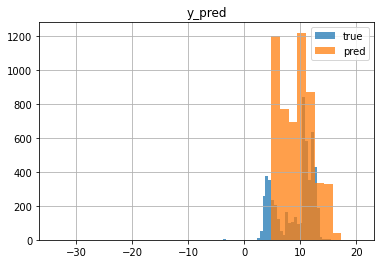

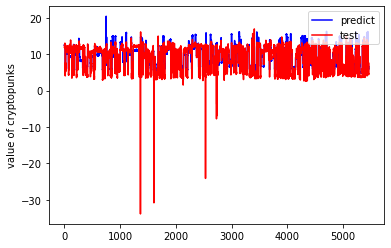

In [120]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance：均方根误差(Root Mean Squared Error, RMSE)
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  #这个10是你测试级的数量
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)
#做ROC曲线
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=1)
plt.legend(loc="upper right") #显示图中的标签
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

In [121]:
y = np.array(df_cryp['Price']) 
X = np.array(df_cryp[['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     394.9
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        05:51:49   Log-Likelihood:            -2.3864e+05
No. Observations:               17204   AIC:                         4.773e+05
Df Residuals:                   17194   BIC:                         4.774e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.433e+04   8012.226      1.788      0.0

In [122]:
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,date_z,sales_shift,daily_sales_change,Price,Log_price,Male,Dark,Light,Medium,Non-human
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,2017-06-23,0.42,3.961905,9.8055,2.282943,1,0,0,0,0
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,2017-06-23,0.42,3.961905,65.3700,4.180063,0,0,1,0,0
8,15,15,2017-06-23,1406,1218,0.03,5621,Human,Female,Medium,...,2017-06-23,0.42,3.961905,9.8055,2.282943,0,0,0,1,0
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,2017-06-23,0.42,3.961905,13.0740,2.570626,0,0,0,1,0
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,2017-06-23,0.42,3.961905,81.7125,4.403207,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,17613,17613,2022-07-26,3002,1044,94.90,5600,Human,Male,Albino,...,2022-07-26,410.40,-0.371589,137567.9890,11.831874,1,0,0,0,0
17753,17440,17440,2022-07-26,5318,4950,69.00,4430,Human,Female,Albino,...,2022-07-26,410.40,-0.371589,100023.0900,11.513156,0,0,0,0,0
17752,12450,12450,2022-07-26,980,1939,94.00,9099,Human,Male,Light,...,2022-07-26,410.40,-0.371589,136263.3400,11.822345,1,0,1,0,0
17783,13214,13214,2022-07-27,3096,1028,69.69,6221,Human,Female,Dark,...,2022-07-27,257.90,-0.322838,114074.1672,11.644604,0,1,0,0,0


# Sentiment Regression

In [123]:
df_sentiment=pd.read_csv("https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/analyzed_price%20regression/CryptoPunk_Sentiment%20Score%20Polarity_NAdroped.csv")
df_sentiment=df_sentiment[['date','polarity']]
df_sentiment

,date,polarity
0,2017-08-10,1.000000
1,2017-08-14,-1.000000
2,2017-08-31,1.000000
3,2017-09-01,-1.000000
4,2017-09-04,-1.000000
...,...,...
261,2021-07-18,0.000000
262,2021-07-19,0.714286
263,2021-07-20,0.600000
264,2021-07-21,0.200000


In [124]:
df_cryp['date_z']

0        2017-06-23
4        2017-06-23
8        2017-06-23
1        2017-06-23
2        2017-06-23
            ...    
17754    2022-07-26
17753    2022-07-26
17752    2022-07-26
17783    2022-07-27
17784    2022-07-27
Name: date_z, Length: 17204, dtype: object

In [125]:
df_cryp = df_cryp.merge(df_sentiment, left_on='date_z',
                      right_on='date')
df_cryp=df_cryp.dropna()

In [126]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

for train_idx, test_idx in tss.split(df_cryp):
    print("TRAIN:", train_idx, "TEST:", test_idx)
train_df = df_cryp.filter(items=train_idx, axis=0)
test_df =  df_cryp.filter(items=test_idx, axis=0)   

train_df.head()
test_df.head()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [   0    1    2 ... 1926 1927 1928] TEST: [1929 1930 1931 ... 3854 3855 3856]
TRAIN: [   0    1    2 ... 3854 3855 3856] TEST: [3857 3858 3859 ... 5782 5783 5784]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,daily_sales_change,Price,Log_price,Male,Dark,Light,Medium,Non-human,date,polarity
3857,13908,13908,2021-04-12,179,5795,19.99,7556,Human,Female,Medium,...,-0.068672,42734.4221,10.662760,0,0,0,1,0,2021-04-12,0.75
3858,13896,13896,2021-04-12,1727,1246,23.95,2878,Human,Male,Dark,...,-0.068672,51200.0705,10.843496,1,1,0,0,0,2021-04-12,0.75
3859,13866,13866,2021-04-12,1406,989,25.40,6113,Human,Female,Dark,...,-0.068672,54299.8660,10.902277,0,1,0,0,0,2021-04-12,0.75
3860,13889,13889,2021-04-12,3392,5721,27.99,6896,Human,Female,Albino,...,-0.068672,59836.7421,10.999375,0,0,0,0,0,2021-04-12,0.75
3861,13913,13913,2021-04-12,3392,1067,34.99,9481,Human,Female,Dark,...,-0.068672,74801.2721,11.222590,0,1,0,0,0,2021-04-12,0.75


In [127]:
cols_R = ['Log_price','polarity','Dark','Light','Medium','Male','skin_tone','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']
cols_R

['Log_price',
 'polarity',
 'Dark',
 'Light',
 'Medium',
 'Male',
 'skin_tone',
 'wallet_change',
 'daily_sales_change',
 'Rarity_Score_3_multiple',
 'gas_eth_price',
 'eth_usd_price']

In [128]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,Log_price,polarity,Dark,Light,Medium,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price
3857,10.662760,0.75,0,0,1,0,Medium,-0.018182,-0.068672,14.853675,4.589860e+08,2137.79
3858,10.843496,0.75,1,0,0,1,Dark,-0.018182,-0.068672,200.561128,4.589860e+08,2137.79
3859,10.902277,0.75,1,0,0,0,Dark,-0.018182,-0.068672,117.815767,4.589860e+08,2137.79
3860,10.999375,0.75,0,0,0,0,Albino,-0.018182,-0.068672,0.000000,4.589860e+08,2137.79
3861,11.222590,0.75,1,0,0,0,Dark,-0.018182,-0.068672,418.559172,4.589860e+08,2137.79


In [129]:
X_train = pd.DataFrame(df_R_train,columns=['polarity','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['polarit','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [130]:
def mul_lr():   
    #剔除日期数据，一般没有这列可不执行，选取以下数据http://blog.csdn.net/chixujohnny/article/details/51095817
    X_train = pd.DataFrame(df_R_train,columns=['polarity','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_train = pd.DataFrame(df_R_train['Log_price'])
    X_test = pd.DataFrame(df_R_test,columns=['polarity','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price'])
    y_test = pd.DataFrame(df_R_test['Log_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # 训练后模型截距
    print (linreg.intercept_)
    # 训练后模型权重（特征个数无变化）
    print (linreg.coef_)
mul_lr()

X_train.shape=(3857, 10)
 y_train.shape =(3857, 1)
 X_test.shape=(1928, 10)
,  y_test.shape=(1928, 1)
LinearRegression()
[6.08006219]
[[-6.65653462e-02 -2.94556556e-01 -1.75587981e-01 -2.12643201e-01
  -1.62790247e-01 -4.27316759e-02  2.05226605e-02  2.15451646e-05
   8.75329476e-10  2.27736990e-03]]


In [131]:
df_cryp.describe()

,Unnamed: 0,Unnamed: 0.1,from,to,eth_price,punk_id,attr_count,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,...,sales_shift,daily_sales_change,Price,Log_price,Male,Dark,Light,Medium,Non-human,polarity
count,5785.000000,5785.000000,5785.000000,5785.000000,5.785000e+03,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,...,5785.000000,5785.000000,5.785000e+03,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000
mean,9566.361452,9566.361452,3131.734659,3225.413483,2.552626e+01,5335.916508,2.792913,10.979948,6.362930,204.310132,...,1391.151481,1.324239,5.308053e+04,10.390525,0.672947,0.300605,0.299049,0.304235,0.004322,0.492641
std,4142.418774,4142.418774,1797.595830,1842.664804,6.252273e+01,2698.139442,0.737729,11.264446,5.006478,2398.788085,...,1629.724977,3.808112,1.184697e+05,1.474345,0.469177,0.458561,0.457881,0.460122,0.065602,0.518923
min,34.000000,34.000000,3.000000,8.000000,4.000000e-17,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.075000,-1.000000,7.239040e-14,-30.256703,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,6527.000000,6527.000000,1566.000000,1564.000000,1.500000e+01,3056.000000,2.000000,4.928729,3.647085,0.000000,...,343.670000,-0.314990,2.950822e+04,10.292424,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
50%,10595.000000,10595.000000,3096.000000,3190.000000,2.140000e+01,5348.000000,3.000000,7.390420,4.889871,32.992221,...,849.486000,0.112230,4.189458e+04,10.642912,1.000000,0.000000,0.000000,0.000000,0.000000,0.600000
75%,12939.000000,12939.000000,4738.000000,4844.000000,2.699000e+01,7662.000000,3.000000,12.299445,7.374069,108.528893,...,1868.230000,1.539240,5.989503e+04,11.000349,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,15487.000000,15487.000000,6434.000000,6434.000000,4.200000e+03,9998.000000,6.000000,100.000000,77.811760,163669.688714,...,7218.813990,29.814556,7.673652e+06,15.853303,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
y = np.array(df_cryp['Price']) 
X = np.array(df_cryp[['polarity','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     30.94
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           7.19e-59
Time:                        05:51:50   Log-Likelihood:                -75640.
No. Observations:                5785   AIC:                         1.513e+05
Df Residuals:                    5774   BIC:                         1.514e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.912e+04   7671.518      3.796      0.0